In [54]:
# importamos la liberías necesarias 
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [7]:
datos  = np.loadtxt('data_perceptron.txt')

X = datos[:,:2]
y =  datos[:,2].reshape((datos.shape[0],1))

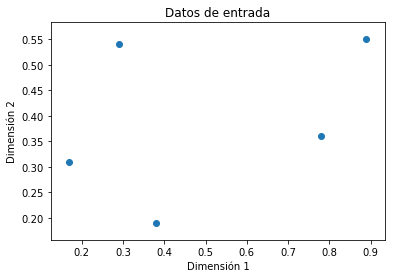

In [9]:
# Cuadro inutil
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Datos de entrada')
plt.show()

In [12]:
dim1_min, dim1_max, dim2_min, dim2_max = 0,1,0,1

num_output = y.shape[1]

# definimos las entradas
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]

perceptron = nl.net.newp([dim1, dim2], num_output)

In [13]:
# entrenamos el perceptron

# lr = tasa de aprendizaje, me dice que tan rapido o lento se actualizan los pasos 
# epochs = cuántas veces recorro todo el conjunto de entrenamiento

progreso_error = perceptron.train(X,y, epochs=100, show = 20, lr=0.03)

The goal of learning is reached


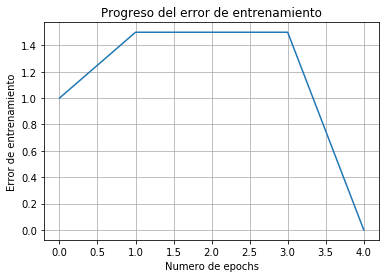

In [15]:
# cajita inutil 
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Numero de epochs')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso del error de entrenamiento')
plt.grid()
plt.show()

# Construimos un perceptrón para 4 clases

En este caso cargamos los datos del archivo data_nn_simple. Cada observación consta de cuatro valores numéricos, dos son características y los  restantes conforman la etiqueta ( 2 bits para representar 4 clases)

In [18]:
# cargamos los datos

datos = np.loadtxt('data_simple_nn.txt')
X = datos[:,0:2]
y = datos[:,2:]
print(y)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]


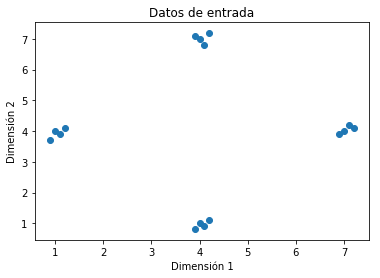

In [20]:
# Cuadro inutil
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Datos de entrada')
plt.show()

In [24]:
# Definimos los valores maximos y minimos para cada dimension 

dim1_min, dim1_max = X[:,0].min(), X[:,0].max()
dim2_min, dim2_max = X[:,1].min(), X[:,1].max()

# definimos las entradas
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]


# numero de neuronas a la salida
num_output = y.shape[1]

In [25]:
# definimos el perceptron 
perceptron = nl.net.newp([dim1,dim2], num_output)

In [31]:
# entrenamos el perceptron
progreso_error = perceptron.train(X,y, epochs=100, show = 25, lr=0.03)

Epoch: 25; Error: 4.0;
Epoch: 50; Error: 4.0;
Epoch: 75; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


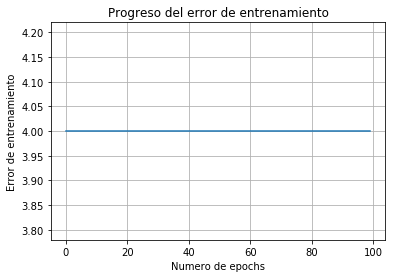

In [32]:
# cajita inutil 
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Numero de epochs')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso del error de entrenamiento')
plt.grid()
plt.show()

In [33]:
data_test = [[0.4,4.3],[4.4,0.6],[4.7,8.1]]
for item in data_test:
    print(item, '---->', perceptron.sim([item])[0])

[0.4, 4.3] ----> [ 0.  0.]
[4.4, 0.6] ----> [ 1.  0.]
[4.7, 8.1] ----> [ 1.  1.]


# Construimos una ANN multicapa para predicción 

Generamos los datos para la función 

$$y = 3x^2+5$$

In [41]:
# generamos el conjunto de entrenamiento 
val_min = -15
val_max = 15
num_datos = 130
X = np.linspace(val_min, val_max, 130)
y = (3*X**2) + 5


# Normalizamos y con respecto a la norma
y /= np.linalg.norm(y)

X = X.reshape(num_datos,1)
y = y.reshape(num_datos, 1)

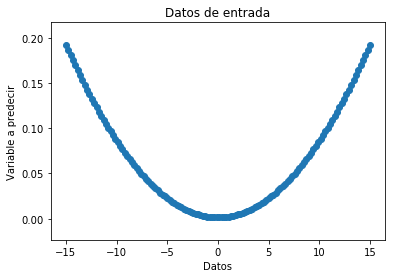

In [42]:
# Cuadro inutil
plt.figure()
plt.scatter(X, y)
plt.xlabel('Datos')
plt.ylabel('Variable a predecir')
plt.title('Datos de entrada')
plt.show()

In [55]:
# definimos una red neuronal con dos capas ocultas con 10 neuronas en la primera capa(10 bolas) y 6 en la segunda capa 

ANN = nl.net.newff([[val_min,val_max]], [10,6,1])

ANN.trainf = nl.train.train_gd # especificamos que el algoritmos de optimizacion será gradiente descendiente

progreso_error = ANN.train(X,y, epochs=5000, show=250, goal=0.01)

Epoch: 250; Error: 0.05427230751892577;
Epoch: 500; Error: 0.041650165884638775;
Epoch: 750; Error: 0.037386362113006374;
Epoch: 1000; Error: 0.03310693349830161;
Epoch: 1250; Error: 0.02718219898324029;
Epoch: 1500; Error: 0.02104476420693954;
Epoch: 1750; Error: 0.015912654196989933;
Epoch: 2000; Error: 0.012046738782897994;
The goal of learning is reached


In [56]:
y_pred = ANN.sim(X)
y_pred = y_pred.reshape(num_datos)

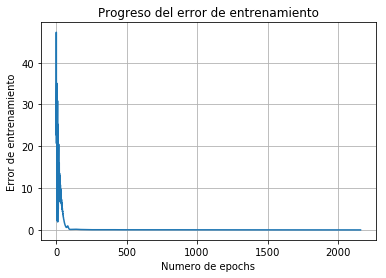

In [57]:
# cajita inutil 
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Numero de epochs')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso del error de entrenamiento')
plt.grid()
plt.show()

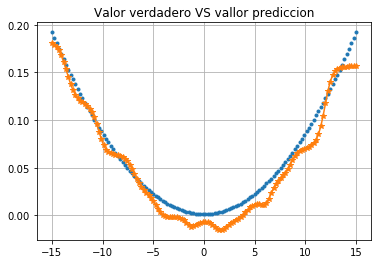

In [58]:
plt.figure()
plt.plot(X,y, '.', X,y_pred, '*-')
plt.title('Valor verdadero VS vallor prediccion')
plt.grid()
plt.show()